In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [147]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

wines_df =  pd.read_csv(url, sep=';')

wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [157]:
wines_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [153]:
for index, column in enumerate(wines_df.columns):
    print(index, column)

0 fixed acidity
1 volatile acidity
2 citric acid
3 residual sugar
4 chlorides
5 free sulfur dioxide
6 total sulfur dioxide
7 density
8 pH
9 sulphates
10 alcohol
11 quality


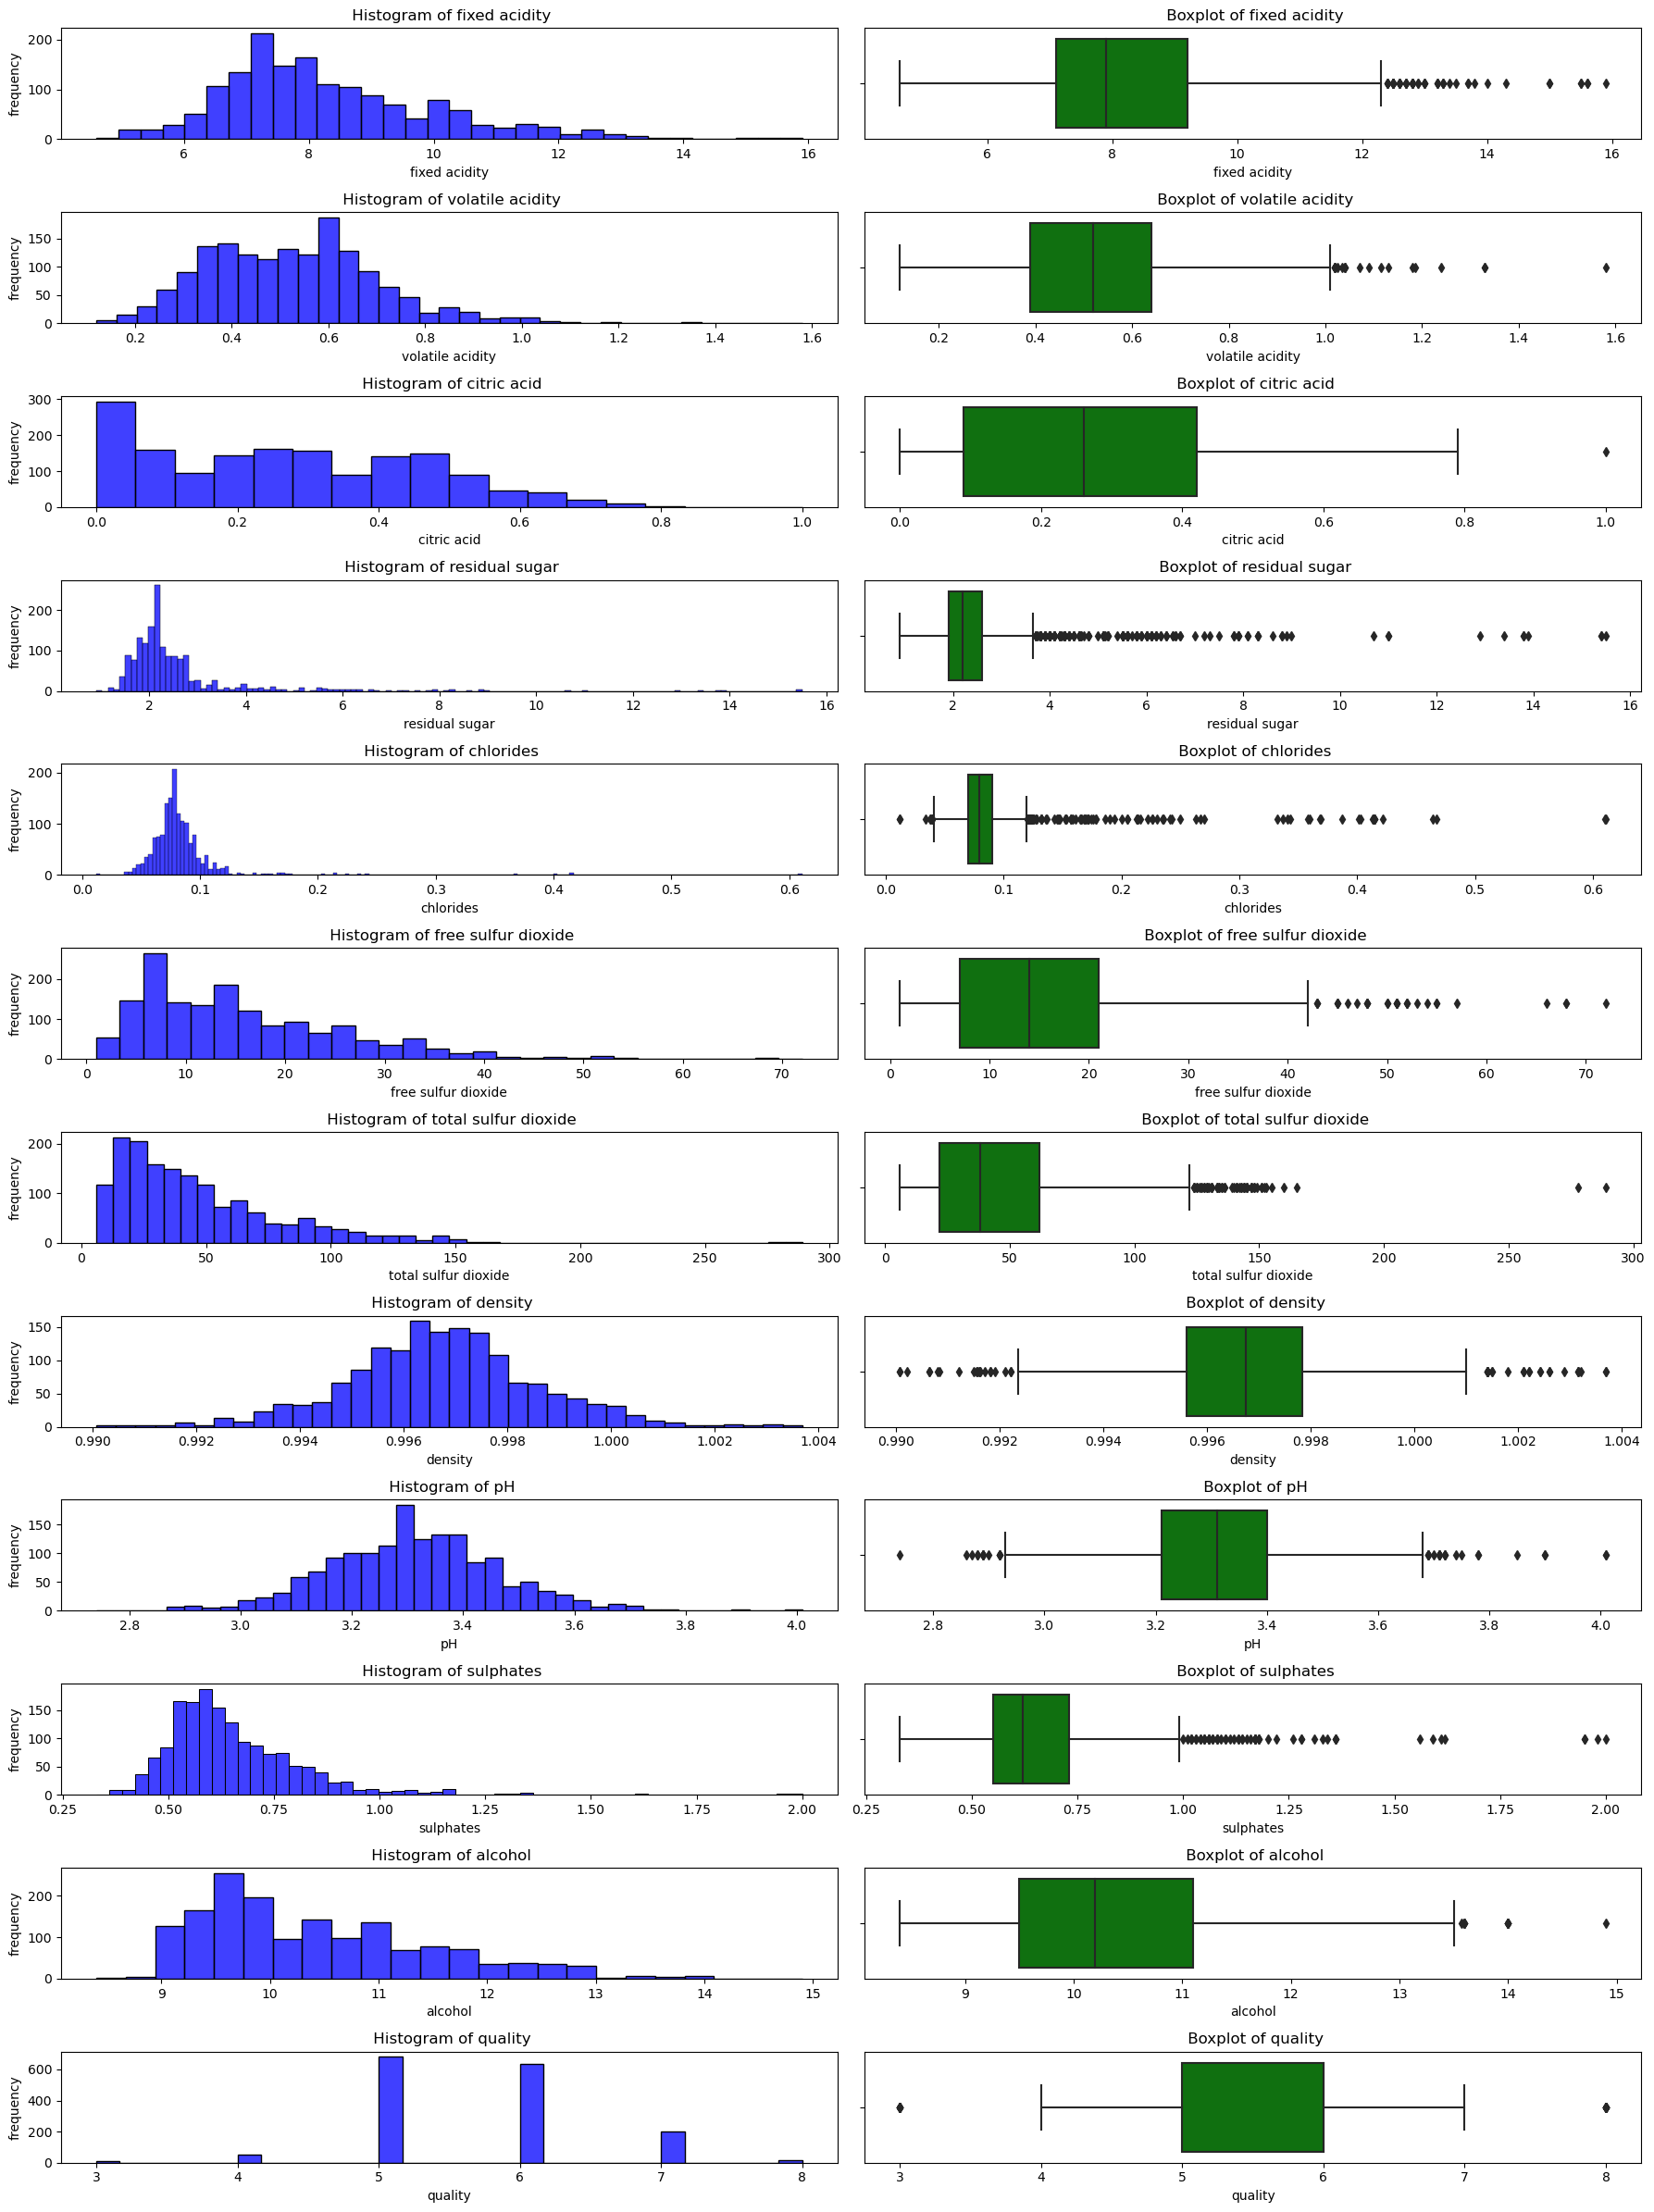

In [161]:
# Setup matplot figure
plt.figure(figsize=(18,24))

# Generate a loop to have hist plot and box plot for each column

for index, column in enumerate(wines_df.columns):
    # Create asubplotfor each histogram
    plt.subplot(len(wines_df.columns), 2, 2*index +1)
    sns.histplot(wines_df[column], kde=False,  color='blue')
    plt.title(f" Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("frequency")

    # Creare a subplot for boxplot
    plt.subplot(len(wines_df.columns), 2, 2*index +2)
    sns.boxplot(x=wines_df[column],  color='green')
    plt.title(f" Boxplot of {column}")
    plt.xlabel(column)
    

plt.tight_layout()
plt.show()
    
    


In [1]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select the density and sulphates column
data_to_scale = wines_df[['density','sulphates']]

# Applying MinMaxScaler
min_max_scaler = MinMaxScaler()

data_min_max_scaled = min_max_scaler.fit_transform(data_to_scale)

# Convert the scale data to dataframe

df_min_max_scaled = pd.DataFrame(data_min_max_scaled, columns=['density_min_max_scaled','sulphates_min_max_scaled'])

# Standard scalar
standard_scaler = StandardScaler()

data_standard_scaled = standard_scaler.fit_transform(data_to_scale)

# Convert the scale data to dataframe

df_standard_scaled = pd.DataFrame(data_standard_scaled, columns=['density_standard_scaled','sulphates_standard_scaled'])

NameError: name 'wines_df' is not defined

In [189]:
print("MIn max scaled data")
print(df_min_max_scaled)

print("Standard scaled data")
print(df_standard_scaled)

MIn max scaled data
      density_min_max_scaled  sulphates_min_max_scaled
0                   0.567548                  0.137725
1                   0.494126                  0.209581
2                   0.508811                  0.191617
3                   0.582232                  0.149701
4                   0.567548                  0.137725
...                      ...                       ...
1594                0.354626                  0.149701
1595                0.370778                  0.257485
1596                0.416300                  0.251497
1597                0.396476                  0.227545
1598                0.397944                  0.197605

[1599 rows x 2 columns]
Standard scaled data
      density_standard_scaled  sulphates_standard_scaled
0                    0.558274                  -0.579207
1                    0.028261                   0.128950
2                    0.134264                  -0.048089
3                    0.664277                 

In [193]:
# Combine all data for easier plotting

combined_data = pd.concat([data_to_scale, df_min_max_scaled, df_standard_scaled])
print("Summary statistics")
combined_data.describe()

Summary statistics


,density,sulphates,density_min_max_scaled,sulphates_min_max_scaled,density_standard_scaled,sulphates_standard_scaled
count,1599.000000,1599.000000,1599.000000,1599.000000,1.599000e+03,1.599000e+03
mean,0.996747,0.658149,0.490211,0.196496,-3.471395e-14,6.754377e-16
std,0.001887,0.169507,0.138571,0.101501,1.000313e+00,1.000313e+00
min,0.990070,0.330000,0.000000,0.000000,-3.538731e+00,-1.936507e+00
25%,0.995600,0.550000,0.406021,0.131737,-6.077557e-01,-6.382196e-01
50%,0.996750,0.620000,0.490455,0.173653,1.760083e-03,-2.251281e-01
75%,0.997835,0.730000,0.570117,0.239521,5.768249e-01,4.240158e-01
max,1.003690,2.000000,1.000000,1.000000,3.680055e+00,7.918677e+00


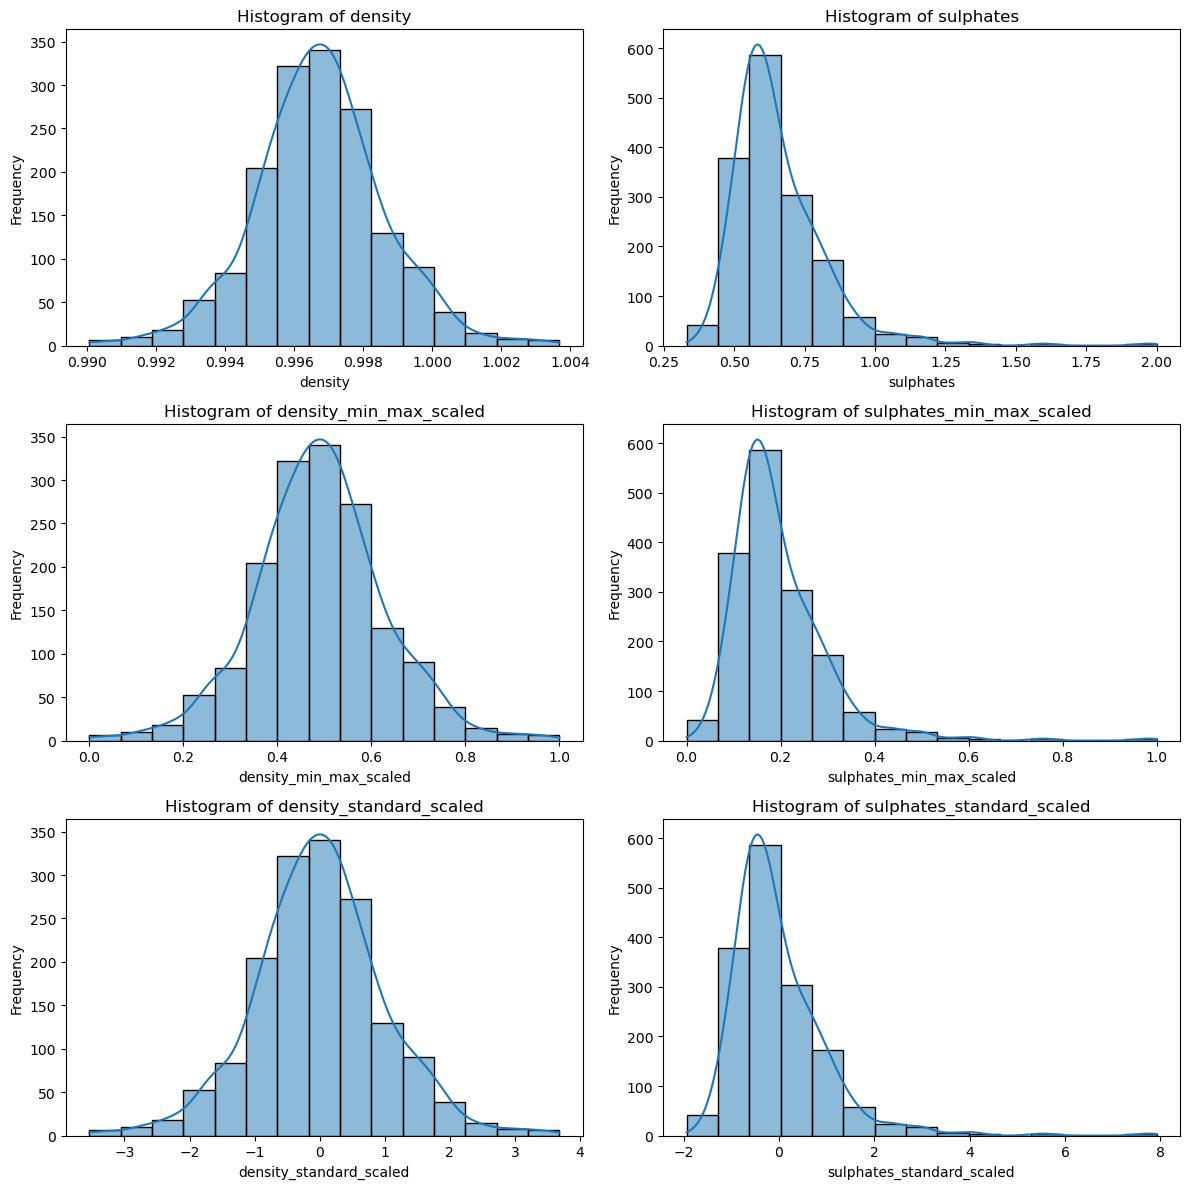

In [207]:
# Plotting histograms for the original and scaled data

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
axes = axes.ravel() # Flatten the axes array for easy iteration

for idx, col in enumerate(combined_data.columns):
    sns.histplot(combined_data[col], bins=15, kde= True, ax = axes[idx])
    axes[idx].set_title(f"Histogram of {col}")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Frequency")


plt.tight_layout()
plt.show()

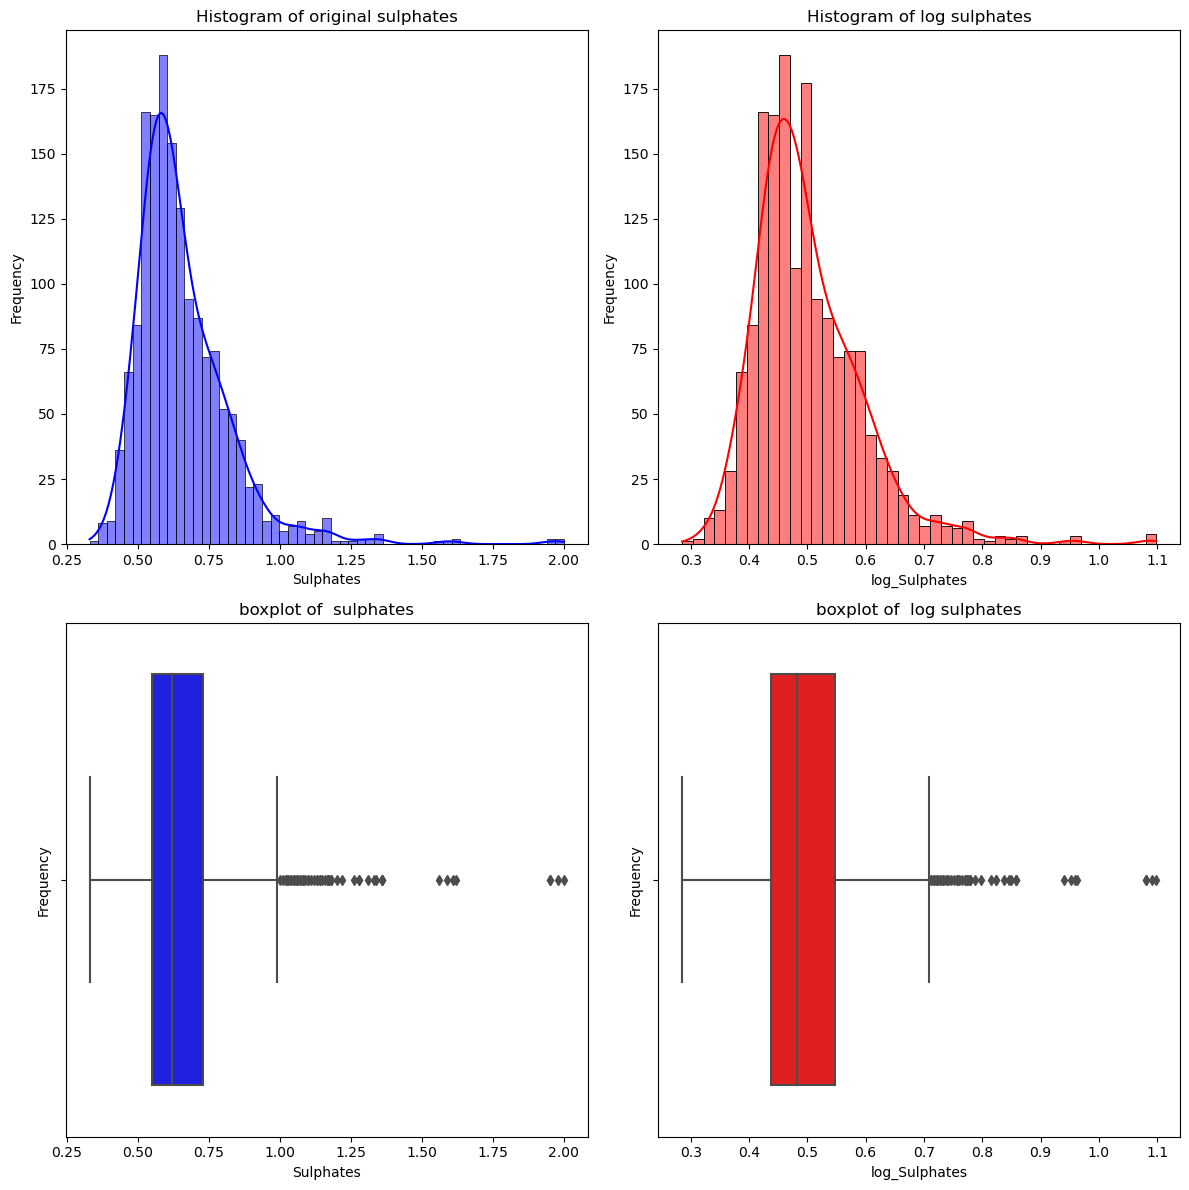

In [217]:
# Apply log transformation to the sulphates column

wines_df['sulphates_log'] = np.log(wines_df['sulphates'] +1) # Adding 1 to the sulphates

# Set up the fig size

plt.figure(figsize=(12,12))

# PLotting the histogram for the original sulphates

plt.subplot(2,2,1)  # 2 rows, 2 column, 1st subplot

sns.histplot(wines_df['sulphates'], kde= True, color='blue')
plt.title("Histogram of original sulphates")
plt.xlabel("Sulphates")
plt.ylabel("Frequency")

# Plotting the histogram for the log transformed sulphates
plt.subplot(2,2,2) 
sns.histplot(wines_df['sulphates_log'], kde= True, color='red')
plt.title("Histogram of log sulphates")
plt.xlabel("log_Sulphates")
plt.ylabel("Frequency")

# Plotting the boxplot for the original sulphates
plt.subplot(2,2,3) 
sns.boxplot(x=wines_df['sulphates'],  color='blue')
plt.title("boxplot of  sulphates")
plt.xlabel("Sulphates")
plt.ylabel("Frequency")

# Plotting the boxplot for the log sulphates
plt.subplot(2,2,4) 
sns.boxplot(x=wines_df['sulphates_log'],  color='red')
plt.title("boxplot of  log sulphates")
plt.xlabel("log_Sulphates")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [221]:
# calculate skewness

skewness = wines_df.skew()
print("skewness of each feature")
print(skewness)

skewness of each feature
fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
sulphates_log           1.610497
dtype: float64


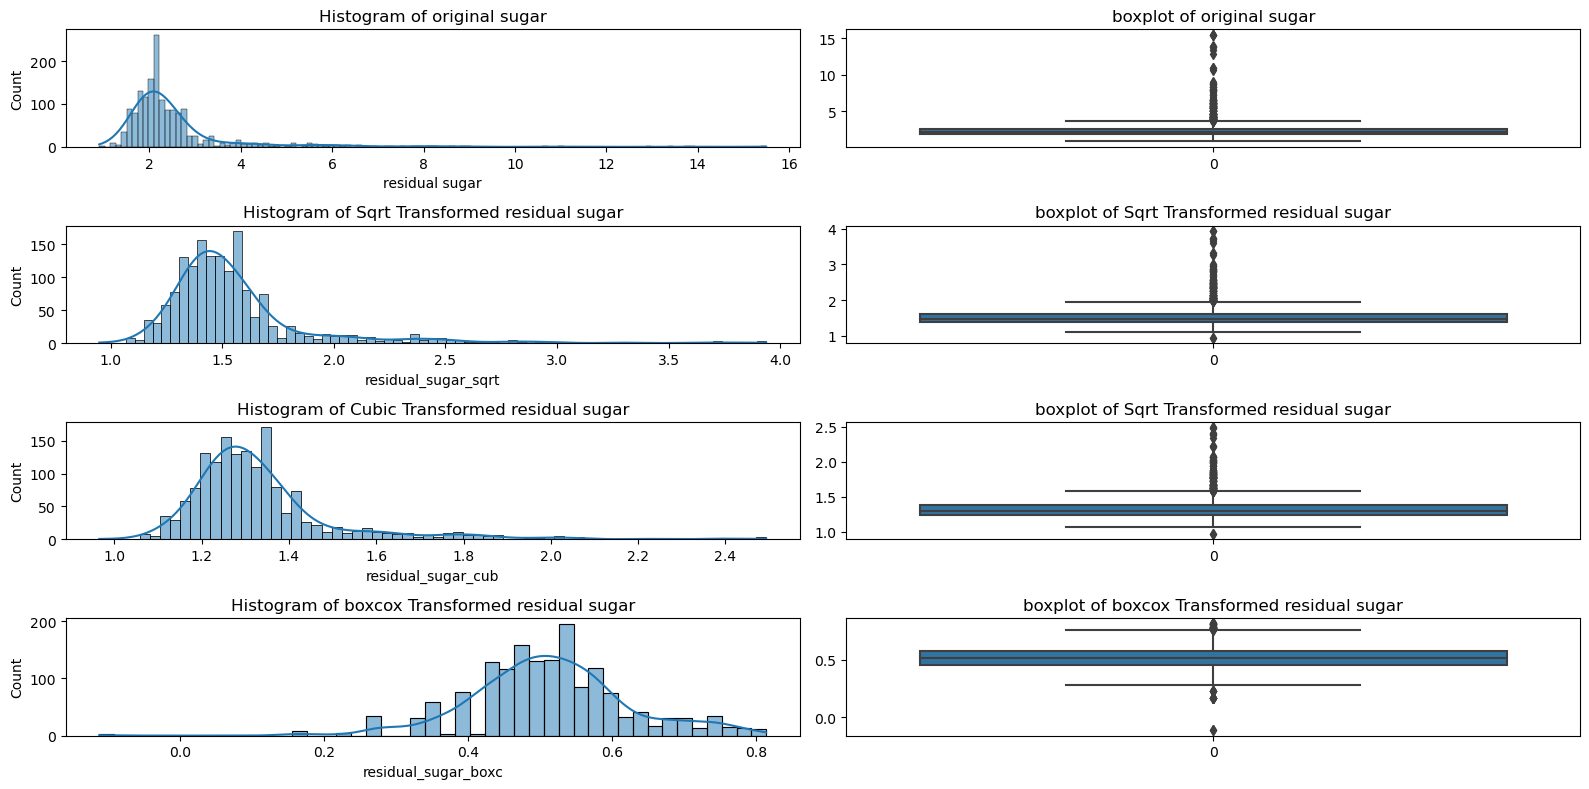

Original skewness:4.54065542590319
Sqrt skewness:2.9567627473692695
Cubic skewness:2.5322010587022343
Box-cox skewness:-0.09593003893246714


In [251]:
from scipy.stats import boxcox

# Apply transformations

wines_df['residual_sugar_sqrt'] = np.sqrt(wines_df['residual sugar'])
wines_df['residual_sugar_cub'] = np.cbrt(wines_df['residual sugar'])
wines_df['residual_sugar_boxc'], _ = boxcox(wines_df['residual sugar'])

# calculate skewness

skew_original = wines_df['residual sugar'].skew()
skew_sqrt = wines_df['residual_sugar_sqrt'].skew()
skew_cub = wines_df['residual_sugar_cub'].skew()
skewboxc = wines_df['residual_sugar_boxc'].skew()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,8))
axes = axes.ravel() # Flatten the axes array for easy iteration

# Original data plots

sns.histplot(wines_df['residual sugar'], kde=True, ax= axes[0])
axes[0].set_title("Histogram of original sugar")
sns.boxplot(wines_df['residual sugar'], ax= axes[1])
axes[1].set_title("boxplot of original sugar")

sns.histplot(wines_df['residual_sugar_sqrt'], kde=True, ax= axes[2])
axes[2].set_title("Histogram of Sqrt Transformed residual sugar")
sns.boxplot(wines_df['residual_sugar_sqrt'], ax= axes[3])
axes[3].set_title("boxplot of Sqrt Transformed residual sugar")

sns.histplot(wines_df['residual_sugar_cub'], kde=True, ax= axes[4])
axes[4].set_title("Histogram of Cubic Transformed residual sugar")
sns.boxplot(wines_df['residual_sugar_cub'], ax= axes[5])
axes[5].set_title("boxplot of Sqrt Transformed residual sugar")

sns.histplot(wines_df['residual_sugar_boxc'], kde=True, ax= axes[6])
axes[6].set_title("Histogram of boxcox Transformed residual sugar")
sns.boxplot(wines_df['residual_sugar_boxc'], ax= axes[7])
axes[7].set_title("boxplot of boxcox Transformed residual sugar")


plt.tight_layout()
plt.show()

#print skew results

print(f"Original skewness:{skew_original}")
print(f"Sqrt skewness:{skew_sqrt}")
print(f"Cubic skewness:{skew_cub}")
print(f"Box-cox skewness:{skewboxc}")

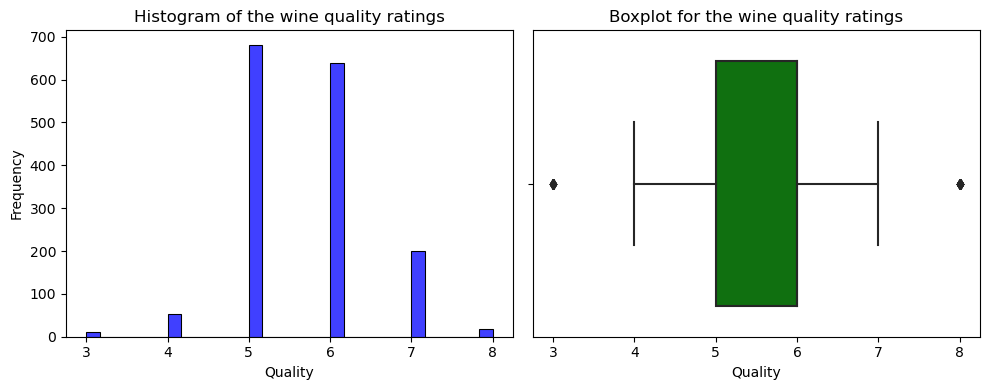

In [257]:
# plotting the distribution of wines data
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(wines_df['quality'], kde= False, color='blue')
plt.title("Histogram of the wine quality ratings")
plt.xlabel("Quality")
plt.ylabel("Frequency")


plt.subplot(1,2,2)
sns.boxplot(x=wines_df['quality'], color='green')
plt.title("Boxplot for the wine quality ratings")

plt.xlabel("Quality")


plt.tight_layout()
plt.show()

In [259]:
# Print summary statistics
print("Summary stats  for wine quaity ratings:")
print(wines_df['quality'].describe())

Summary stats  for wine quaity ratings:
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


In [265]:
# Print value counts
print("Values counts for the wine quality ratings:")
print(wines_df['quality'].value_counts().sort_index())

Values counts for the wine quality ratinghs:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


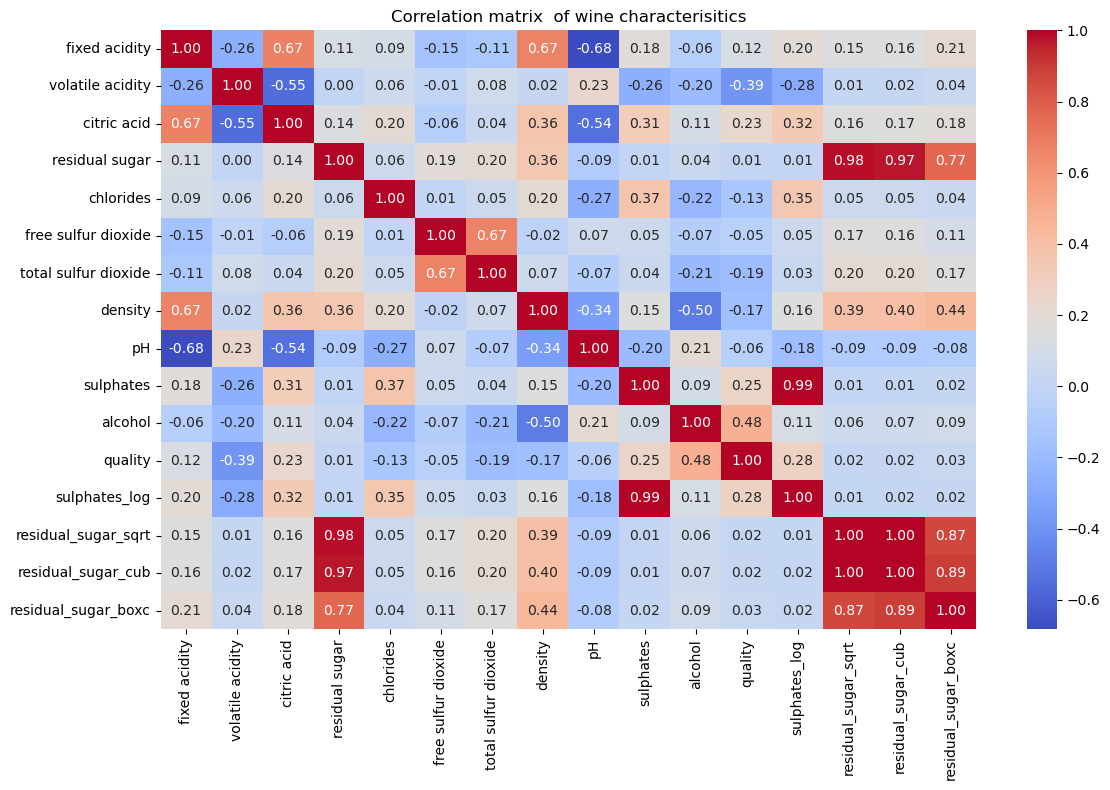

In [267]:
# Correlation matrix

corre_matrix = wines_df.corr()

# Plotting the correlation matrix

plt.figure(figsize=(12,8))

sns.heatmap(corre_matrix, annot=True, fmt='.2f', cmap="coolwarm" )
plt.title("Correlation matrix  of wine characterisitics")
plt.tight_layout()
plt.show()

In [269]:
# Focus on the quality correlations
quality_correlations = corre_matrix['quality'].sort_values(ascending=False)
print("Correlation for the Wine quality")
print(quality_correlations)

Correlation for the Wine quality
quality                 1.000000
alcohol                 0.476166
sulphates_log           0.280984
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual_sugar_boxc     0.029436
residual_sugar_cub      0.020657
residual_sugar_sqrt     0.019048
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


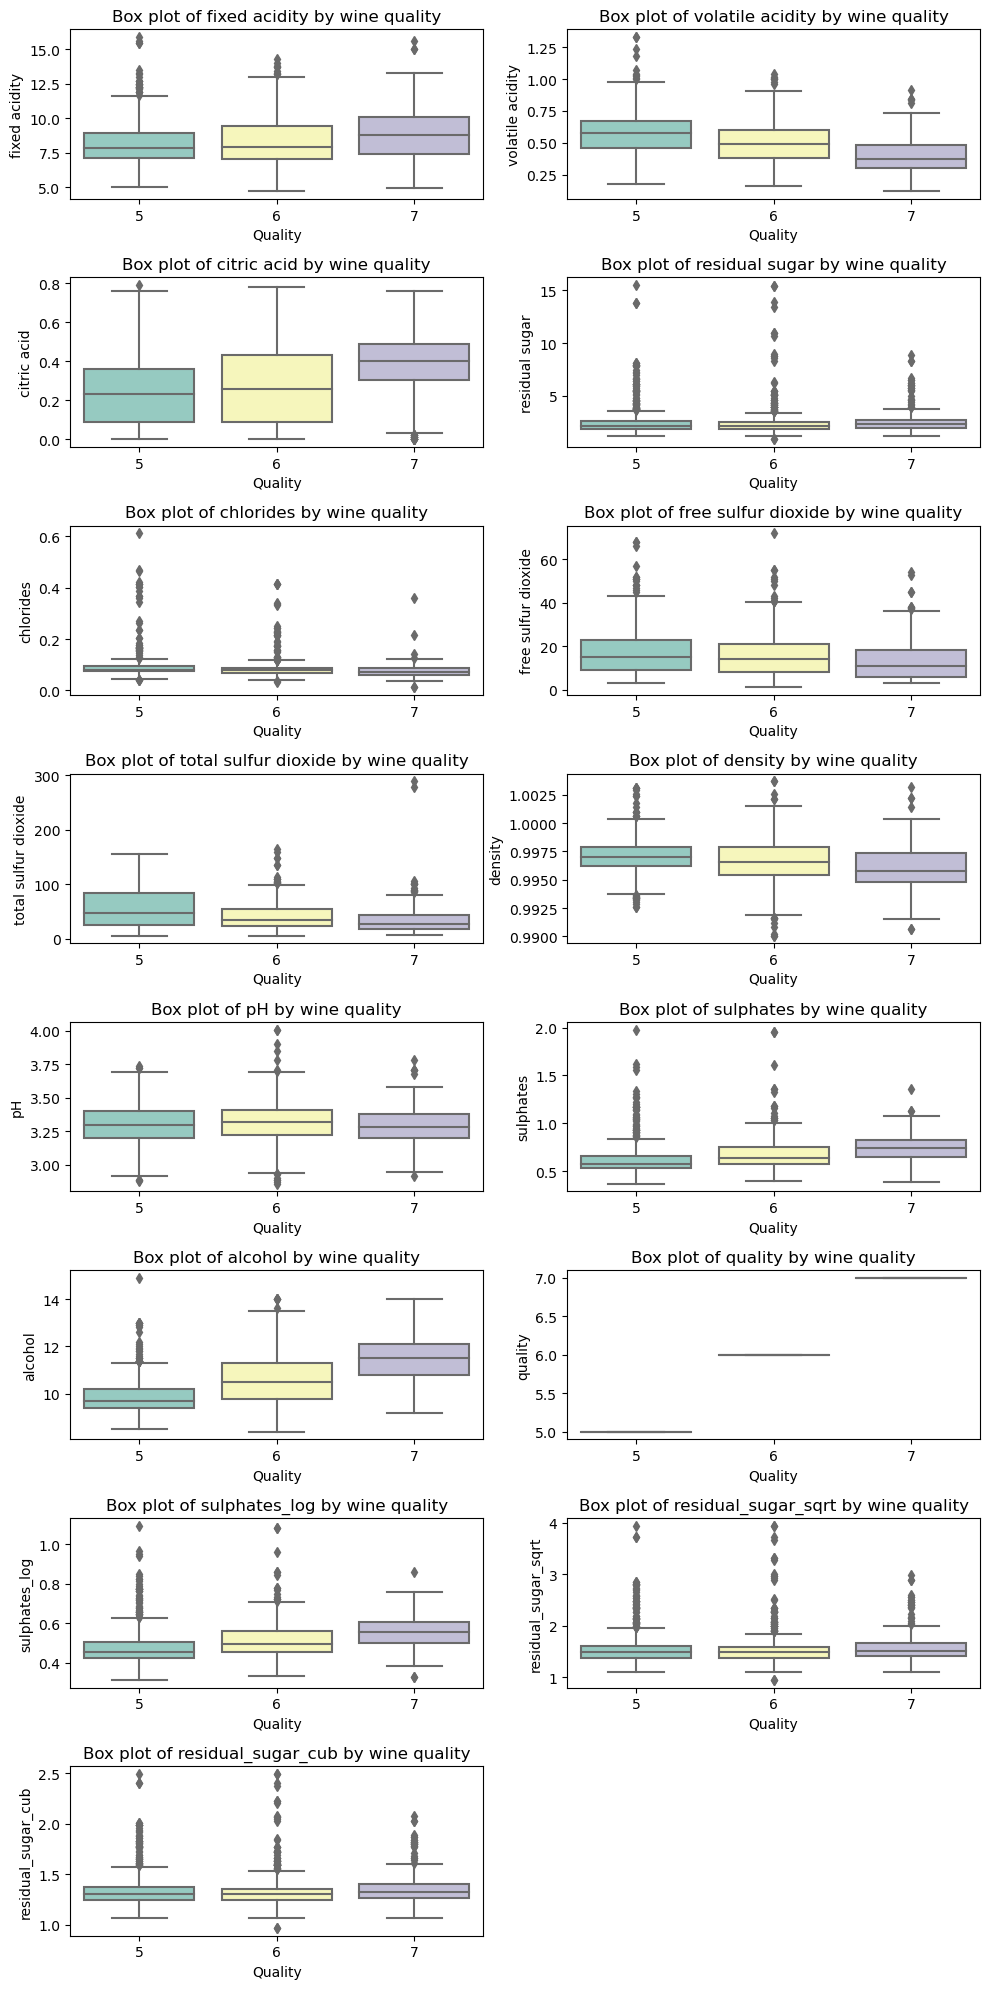

In [283]:
# Filter the wine dataset for the quality ratings of 5, 6,7

filtered_wine_df = wines_df[wines_df['quality'].isin([5,6,7])]
#print(filtered_wine_df)
plt.figure(figsize=(10,20))
#
for index, column in enumerate(filtered_wine_df.columns[:-1]): # Exclude the quality column it self
    plt.subplot(len(filtered_wine_df.columns)// 2, 2, index +1)
    sns.boxplot(x = 'quality', y = column, data = filtered_wine_df, palette='Set3')
    plt.title(f"Box plot of {column} by wine quality")
    plt.xlabel('Quality')
    plt.ylabel(column)
    
plt.tight_layout()
plt.show()
